In [422]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr

In [423]:
os.getcwd()
sys.path.append('/home/sean/Documentos/the_bridge_bootcamp/My_Workspaces/Fish_EDA/src')

In [424]:
import utils.variables as variables

In [425]:
aquaculture_quantity_value = pd.read_csv("../data/Aquaculture_Quantity_Code_Merged.csv", 
                                         usecols = ['PERIOD', 'Quantity', 'Country', 'WaterArea', 
                                                    'Species', 'Scientific_Name', 'Environment'])
print(aquaculture_quantity_value.shape)

(96571, 7)


In [426]:
population_by_country = pd.read_csv("../data/Population_by_Country.csv")
print(population_by_country.shape)

(235, 2)


In [427]:
gpd_per_capita = pd.read_csv("../data/Country_GDP_per_Capita.csv")
gpd_per_capita.shape

(190, 2)

In [428]:
freshwater_country = pd.read_csv("../data/Freshwater_per_Country.csv")
freshwater_country.rename(columns = {'Total renewable water resources (km³)': 'Total Renewable Water'}, inplace = True)
freshwater_country.shape

(170, 2)

In [429]:
lpi_global_ranks = pd.read_csv("../data/lpi_global_ranks_2018.csv",
                               usecols=['Country', 'LPI Score'])
print(lpi_global_ranks.shape)
lpi_global_ranks.head()


(160, 2)


,Country,LPI Score
0,Germany,4.20
1,Sweden,4.05
2,Belgium,4.04
3,Austria,4.03
4,Japan,4.03


Add populations and convert to millions

In [430]:
aquaculture_quantity_value = pd.merge(aquaculture_quantity_value, population_by_country)
aquaculture_quantity_value.shape

(82586, 8)

Add GDP per capita

In [431]:
aquaculture_quantity_value = pd.merge(aquaculture_quantity_value, gpd_per_capita)
aquaculture_quantity_value.shape

(79717, 9)

Add km3 of total renewable freshwater per country

In [432]:
aquaculture_quantity_value = pd.merge(aquaculture_quantity_value, freshwater_country)
aquaculture_quantity_value.shape

(75299, 10)

Add the LPI (Logistic Performence Index) score (an of the total logistics/transport system of a country)

In [433]:
aquaculture_quantity_value = pd.merge(aquaculture_quantity_value, lpi_global_ranks)
aquaculture_quantity_value.shape

(72662, 11)

In [434]:
aquaculture_quantity_value.rename(columns = {'GDP_per_capita': 'GDP per capita',
                                             'LPI Score': 'Logistic Index'}, inplace = True)

In [435]:
aquaculture_quantity_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72662 entries, 0 to 72661
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PERIOD                 72662 non-null  int64  
 1   Quantity               72662 non-null  float64
 2   Country                72662 non-null  object 
 3   WaterArea              72662 non-null  object 
 4   Environment            72662 non-null  object 
 5   Species                71945 non-null  object 
 6   Scientific_Name        72662 non-null  object 
 7   Population             72662 non-null  int64  
 8   GDP per capita         72662 non-null  int64  
 9   Total Renewable Water  72662 non-null  float64
 10  Logistic Index         72662 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 6.7+ MB


Convert tonnes to tonnes per million people. This allows a better measure of available fish for domestic consumption as well as export.

In [436]:
aquaculture_quantity_value['Kg per capita'] = ((aquaculture_quantity_value['Quantity'] * 1000) / 
                                                   aquaculture_quantity_value['Population'])

Do normalise GDP per capita, TRWR and LPI score for equal weighting (0-1). First log transform the TRWR before 0-1 scaling

In [437]:
aquaculture_quantity_value['log(Total Renewable Water)'] = np.log(aquaculture_quantity_value['Total Renewable Water'])

In [438]:
data = aquaculture_quantity_value['GDP per capita']                       
aquaculture_quantity_value['GDP per capita'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

data = aquaculture_quantity_value['Logistic Index'] 
aquaculture_quantity_value['Logistic Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

data = aquaculture_quantity_value['log(Total Renewable Water)'] 
aquaculture_quantity_value['log(Total Renewable Water)'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

In [439]:
aquaculture_quantity_value.describe()

,PERIOD,Quantity,Population,GDP per capita,Total Renewable Water,Logistic Index,Kg per capita,log(Total Renewable Water)
count,72662.000000,7.266200e+04,7.266200e+04,72662.000000,72662.000000,72662.000000,72662.000000,72662.000000
mean,1996.292120,2.100904e+04,1.174577e+08,0.251876,565.431307,0.570964,0.214401,0.663225
std,17.575192,1.750855e+05,3.009052e+08,0.242692,1203.093504,0.248216,3.321898,0.178230
min,1950.000000,0.000000e+00,3.412430e+05,0.000000,0.020000,0.000000,0.000000,0.000000
25%,1986.000000,0.000000e+00,8.655535e+06,0.046936,43.000000,0.373333,0.000000,0.593538
50%,2000.000000,3.400000e+01,3.481387e+07,0.131095,139.600000,0.555556,0.001608,0.684627
75%,2010.000000,1.086000e+03,6.979998e+07,0.473995,457.200000,0.795556,0.030770,0.776392
max,2020.000000,5.571083e+06,1.439324e+09,1.000000,8233.000000,1.000000,256.109964,1.000000


In [440]:
aquaculture_quantity_value.describe(include = 'object')

,Country,WaterArea,Environment,Species,Scientific_Name
count,72662,72662,72662,71945,72662
unique,130,21,3,522,552
top,"Korea, Republic of",Asia - Inland waters,Freshwater,Rainbow trout,Oncorhynchus mykiss
freq,2756,13558,39273,3827,3827


In [441]:
aquaculture_quantity_value.head()

,PERIOD,Quantity,Country,WaterArea,Environment,Species,Scientific_Name,Population,GDP per capita,Total Renewable Water,Logistic Index,Kg per capita,log(Total Renewable Water)
0,2020,8000.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.003062,24.77,0.0,0.205506,0.550874
1,2019,7950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.003062,24.77,0.0,0.204221,0.550874
2,2018,7900.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.003062,24.77,0.0,0.202937,0.550874
3,2017,6950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.003062,24.77,0.0,0.178533,0.550874
4,2016,6100.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.003062,24.77,0.0,0.156698,0.550874


Now we want to plot the relationships between fish production, fish production per million and the GPD, TRWR and LPI

In [442]:
pairplot_data = (
    aquaculture_quantity_value[aquaculture_quantity_value['PERIOD'] > 2018]
    .groupby('Country', as_index = False)
    .agg({'Kg per capita': 'sum', 
          'GDP per capita': 'mean',
          'log(Total Renewable Water)': 'mean',
          'Logistic Index': 'mean'})
)
pairplot_data['log(Kg per capita)'] = np.log(pairplot_data['Kg per capita'])
pairplot_data = pairplot_data.drop(columns = ['Kg per capita'])
pairplot_data = pairplot_data[['log(Kg per capita)', 'GDP per capita', 'Logistic Index', 'log(Total Renewable Water)']]
pairplot_data.head()

,log(Kg per capita),GDP per capita,Logistic Index,log(Total Renewable Water)
0,-0.886014,0.003062,0.000000,0.550874
1,1.701972,0.052848,0.315556,0.593538
2,-1.451430,0.046936,0.222222,0.492658
3,-2.107153,0.047536,0.044444,0.689146
4,-2.268413,0.177681,0.417778,0.821012


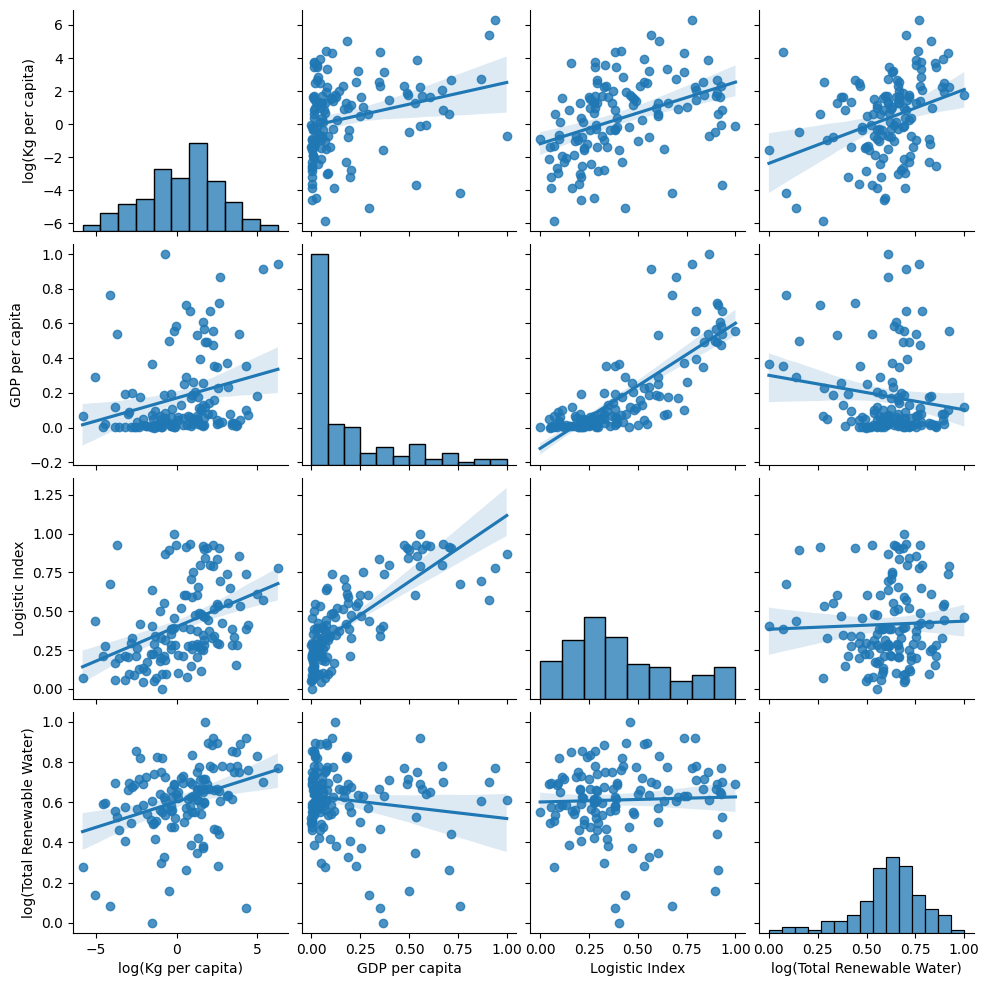

In [443]:
sns.pairplot(pairplot_data, kind = 'reg');

So to create the first part of the metric I will multiply the scaled GDP and LPI values. Then scale this again between 0-1. Then multiply this with the scaled TRWR value. The higher the value, the higher the oppotunity for fish farming

In [444]:
aquaculture_quantity_value['Infrastructure Index'] = (aquaculture_quantity_value['GDP per capita'] + 
                                                  aquaculture_quantity_value['Logistic Index'])
data = aquaculture_quantity_value['Infrastructure Index']
aquaculture_quantity_value['Infrastructure Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

After merging the GDP and LPI scores into one, we then add to the logged water values

In [445]:
aquaculture_quantity_value['Oppotunity Index'] = (aquaculture_quantity_value['Infrastructure Index'] + 
                                                  aquaculture_quantity_value['log(Total Renewable Water)'])
data = aquaculture_quantity_value['Oppotunity Index']
aquaculture_quantity_value['Oppotunity Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

In [446]:
oppotunity_index_by_country = (aquaculture_quantity_value[aquaculture_quantity_value['PERIOD'] > 2018]
                               .groupby('Country', as_index = False)
                               .agg({'Oppotunity Index': 'mean', 
                                     'Infrastructure Index': 'mean',
                                     'log(Total Renewable Water)': 'mean',
                                     'Kg per capita': 'sum'})
                               .sort_values(by = 'Oppotunity Index', ascending = False))
oppotunity_index_by_country['log(Kg per capita)'] = np.log(oppotunity_index_by_country['Kg per capita'])
#oppotunity_index_by_country = oppotunity_index_by_country.drop(columns = 'Kg per capita')

In [447]:
oppotunity_index_by_country.head(10)

,Country,Oppotunity Index,Infrastructure Index,log(Total Renewable Water),Kg per capita,log(Kg per capita)
91,Norway,1.000000,0.919652,0.770634,542.864915,6.296861
22,Canada,0.963268,0.721654,0.919341,9.491589,2.250406
116,Switzerland,0.940496,1.000000,0.610438,0.473296,-0.748034
6,Australia,0.909457,0.786721,0.782067,7.849992,2.060513
115,Sweden,0.904077,0.859904,0.701665,2.343695,0.851729
48,Germany,0.876738,0.832663,0.692220,0.871456,-0.137590
65,Japan,0.873397,0.748752,0.771648,9.817378,2.284154
88,New Zealand,0.858085,0.747863,0.751989,48.351873,3.878505
57,Iceland,0.852760,0.792841,0.699866,218.477519,5.386683
87,Netherlands,0.834995,0.817342,0.651526,5.035929,1.616598


In [448]:
oppotunity_index_by_country.tail(10)

,Country,Oppotunity Index,Infrastructure Index,log(Total Renewable Water),Kg per capita,log(Kg per capita)
46,Gambia,0.166387,0.108224,0.463451,0.027310,-3.600490
0,Afghanistan,0.150885,0.000000,0.550874,0.412296,-0.886014
54,Haiti,0.147694,0.039687,0.506904,0.273624,-1.296002
8,Bahrain,0.133664,0.389169,0.138596,0.006465,-5.041414
19,Burundi,0.129971,0.024590,0.498220,0.252717,-1.375486
66,Jordan,0.111597,0.200337,0.297816,0.391546,-0.937651
74,Lesotho,0.091703,0.083362,0.388096,2.404016,0.877141
81,Malta,0.086213,0.393215,0.070877,76.217118,4.333586
70,Kuwait,0.047434,0.412054,0.000000,0.212580,-1.548435
76,Libya,0.000000,0.073391,0.275013,0.002911,-5.839375


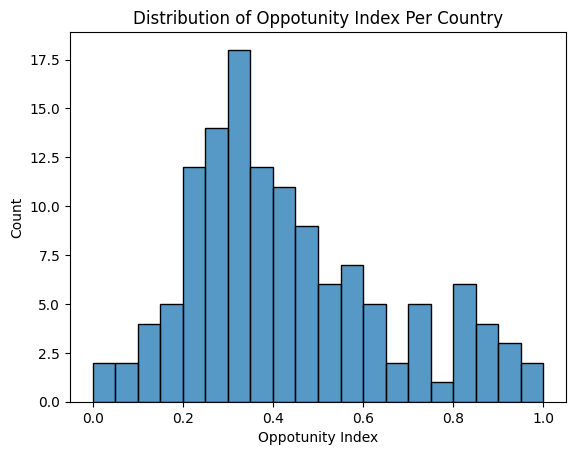

In [449]:
g = sns.histplot(data = oppotunity_index_by_country, x = 'Oppotunity Index', bins = 20)
g.set(title = 'Distribution of Oppotunity Index Per Country');

We need to now correlate this with the variables used

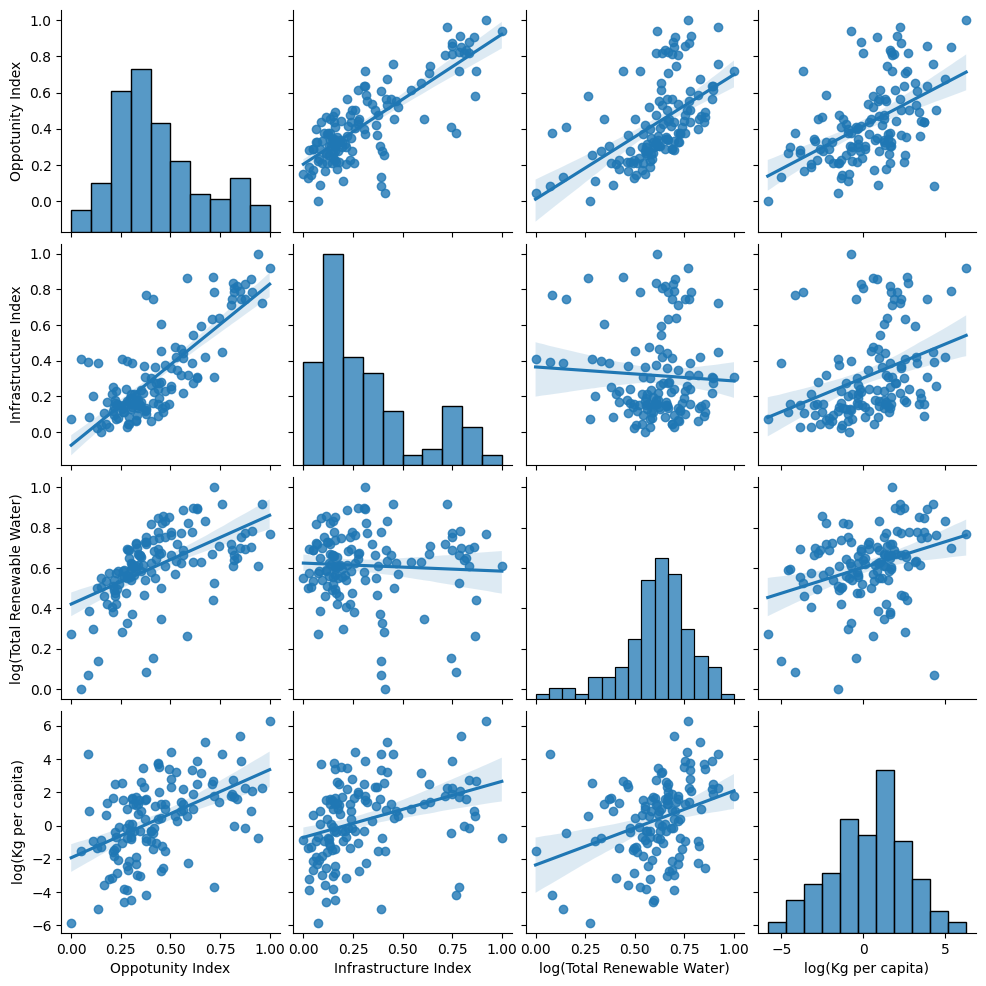

In [450]:
sns.pairplot(oppotunity_index_by_country.drop(columns='Kg per capita'), kind = 'reg');

To compare the current production level with the oppotunity. First substract all tonnes per million by the max(tonnes per million). Then multiply by the index. This means countries with relatively low production but high oppotunity will get high values. Countries with already high levels and high oppotunity are already realising the potential so will score lower. 

First I will select the data from 2018 to 2020 and then sum up total production per country and carry over the Oppotunity Index

In [451]:
# latest_production_levels = aquaculture_quantity_value[aquaculture_quantity_value['PERIOD'] > 2017]
# to_make_final_metric = (latest_production_levels
#                         .groupby('Country', as_index = False)
#                         .agg({'Tonnes_Per_Million_People' : 'sum',
#                               'Oppotunity_Index' : 'mean',
#                               'GDP_per_capita': 'mean',
#                               'TRWR_km3_log': 'mean',
#                               'LPI Score': 'mean'}))

In [452]:
oppotunity_index_by_country['Opportunity Gap Index'] = ((oppotunity_index_by_country['log(Kg per capita)'].max() -
                                         oppotunity_index_by_country['log(Kg per capita)']) *
                                        oppotunity_index_by_country['Oppotunity Index'])
#oppotunity_index_by_country['Final Metric'] = np.log(oppotunity_index_by_country['Final Metric'])

In [453]:
data = oppotunity_index_by_country['Opportunity Gap Index']                       
oppotunity_index_by_country['Opportunity Gap Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

In [454]:
oppotunity_index_by_country.sort_values(by = 'Opportunity Gap Index', ascending=False).head()

,Country,Oppotunity Index,Infrastructure Index,log(Total Renewable Water),Kg per capita,log(Kg per capita),Opportunity Gap Index
11,Belgium,0.718744,0.785417,0.527457,0.025454,-3.670890,1.000000
116,Switzerland,0.940496,1.000000,0.610438,0.473296,-0.748034,0.924826
48,Germany,0.876738,0.832663,0.692220,0.871456,-0.137590,0.787426
7,Austria,0.820214,0.809432,0.639602,0.974573,-0.025756,0.723856
4,Argentina,0.589087,0.317877,0.821012,0.103476,-2.268413,0.704286


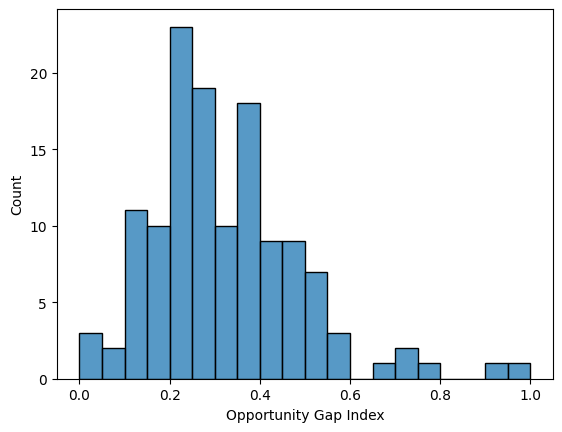

In [455]:
sns.histplot(data = oppotunity_index_by_country, x = 'Opportunity Gap Index', bins = 20);

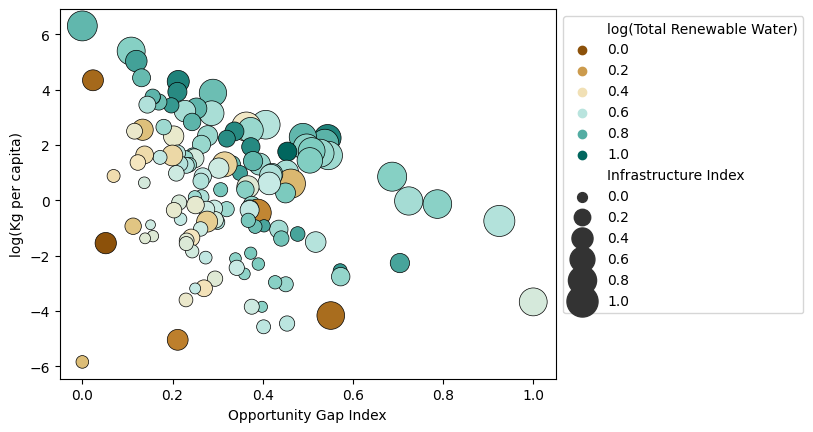

In [456]:
cmap = clr.LinearSegmentedColormap.from_list('dry to wet', 
                                             ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e'], 
                                             N=256)

g = sns.scatterplot(data = oppotunity_index_by_country, 
                x = 'Opportunity Gap Index', 
                y = 'log(Kg per capita)',
                hue = 'log(Total Renewable Water)',
                hue_norm=(0,1),
                size = 'Infrastructure Index',
                sizes = (50, 500),
                size_norm= (0,1),
                palette = cmap,
                linewidth = 0.5,
                edgecolor = 'black')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

So the metric shows Canada as the highest for its high GDP, plentiful water and low fish farming production. In contrast, Norway scores the lowest as dispite havings a very high oppotunity, it already has a very high production meaning it has realised its potential through very active promotion of the fish farming industry.

In [457]:
africa_to_make_final_metric = oppotunity_index_by_country[oppotunity_index_by_country['Country']
                                                   .isin(variables.sub_saharan_african_countries)]

In [458]:
africa_to_make_final_metric.sort_values(by = 'Opportunity Gap Index', ascending = False).head(10)

,Country,Oppotunity Index,Infrastructure Index,log(Total Renewable Water),Kg per capita,log(Kg per capita),Opportunity Gap Index
29,"Congo, Dem. Rep. of the",0.463354,0.113964,0.856207,0.078494,-2.544738,0.571837
111,South Africa,0.475014,0.378475,0.607341,0.221010,-1.509549,0.517590
28,Congo,0.455254,0.136597,0.822704,0.295573,-1.218838,0.477586
21,Cameroon,0.411743,0.160945,0.739969,0.251000,-1.382304,0.441335
34,Côte d'Ivoire,0.425066,0.276137,0.642655,0.350288,-1.048999,0.435840
45,Gabon,0.330822,0.095242,0.697087,0.051668,-2.962910,0.427586
24,Chad,0.265036,0.112887,0.591164,0.010350,-4.570814,0.402041
107,Sierra Leone,0.281357,0.030775,0.695177,0.021311,-3.848517,0.398433
75,Liberia,0.325185,0.067856,0.716908,0.099848,-2.304105,0.390397
78,Madagascar,0.378951,0.104344,0.752567,0.386470,-0.950700,0.383357


In [459]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

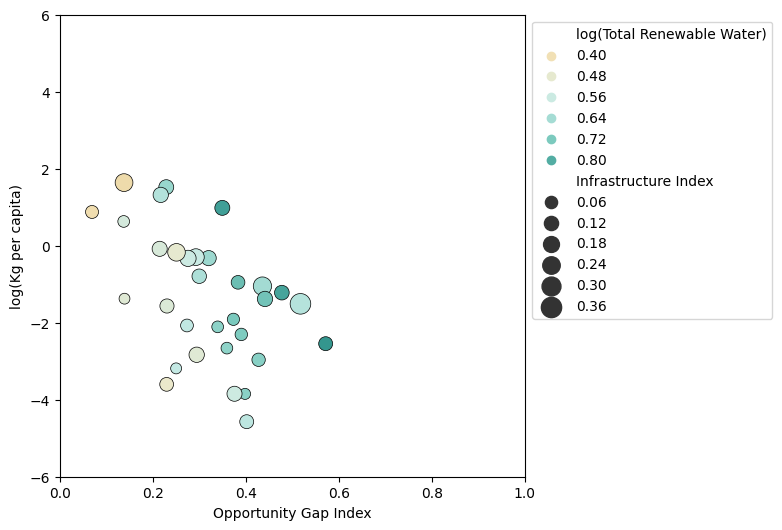

In [460]:
plt.figure(figsize=(6,6))
g = sns.scatterplot(data = africa_to_make_final_metric, 
                x = 'Opportunity Gap Index', 
                y = 'log(Kg per capita)',
                hue = 'log(Total Renewable Water)',
                hue_norm=(0,1),
                size = 'Infrastructure Index',
                sizes = (50,500),
                size_norm= (0,1),
                palette = cmap,
                linewidth = 0.5,
                edgecolor = 'black')
g.set(xlim = (0,1), ylim = (-6,6))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

# label_point(africa_to_make_final_metric['Final Metric'], 
#             africa_to_make_final_metric['TPMP_log'], 
#             africa_to_make_final_metric['Country'], 
#             plt.gca())

Now the same for Asian Countries

In [461]:
asia_to_make_final_metric = oppotunity_index_by_country[(oppotunity_index_by_country['Country']
                                                           .isin(variables.east_asia)) | 
                                                          (oppotunity_index_by_country['Country']
                                                           .isin(variables.south_east_asia))]

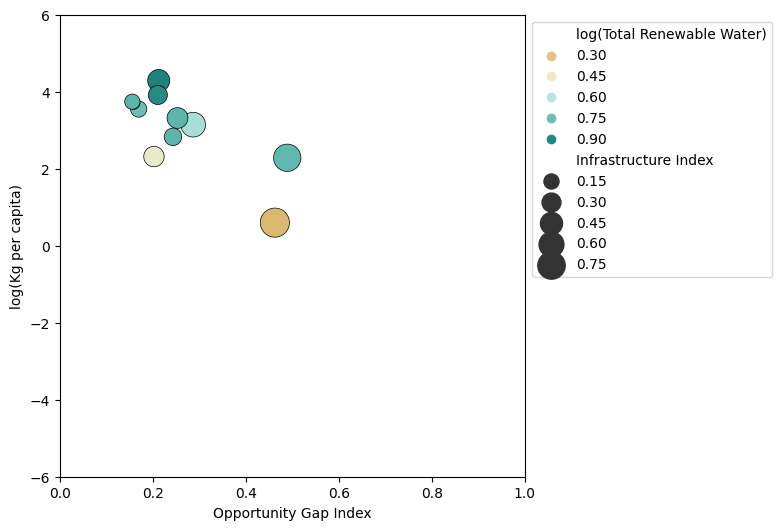

In [462]:
plt.figure(figsize=(6,6))
g = sns.scatterplot(data = asia_to_make_final_metric, 
                x = 'Opportunity Gap Index', 
                y = 'log(Kg per capita)',
                hue = 'log(Total Renewable Water)',
                hue_norm=(0,1),
                size = 'Infrastructure Index',
                sizes = (50,500),
                size_norm= (0,1),
                palette = cmap,
                linewidth = 0.5,
                edgecolor = 'black')
g.set(xlim = (0,1), ylim = (-6,6))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

# label_point(asia_to_make_final_metric['Final Metric'], 
#             asia_to_make_final_metric['log(Kg per capita)'], 
#             asia_to_make_final_metric['Country'], 
#             plt.gca())